In [1]:
%run "C:\Users\puzheng\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

16344


# 0. required packages for h5py

In [2]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

# 1. Create field-of-view class

In [3]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing',
             'save_folder':r'W:\Pu_Temp\20201127_IgH_P-brain\after_clearing',
             #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             'experiment_type': 'DNA',
             'num_threads': 6,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201204-Corrections_3color_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':500,
                     'max_num_seeds': 2500,
                     'spot_seeding_th':150,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 },             
             }

In [12]:
sel_fov_id = 7
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=sel_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 14
- Number of field of views: 60
- Importing csv file: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 14 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
	 561 chro

## 2. Process image into candidate spots

In [13]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('unique', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=True,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\H0R0\Conv_zscan_07.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\H0R0\Conv_zscan_07.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\H0R0\Conv_zscan_07.dax  in 23.478s
-- removing hot pixels for channels:['488'] in 12.861s
-- illumination correction for channels: 488, in 2.533s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 39.504s
-- saving fov_info to file: W:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_07.hdf5
++ base attributes saved:['ref_im'] in 22.708s.
-- checking unique, region:[41 42] in 0.0

# 3. Find chromosomes

## 3.1 load chromosome image

In [15]:
chrom_im = fov._load_chromosome_image(_type='forward', _overwrite=False)

No forward chrom detected in color usage, generate chromosome with existing data
- Generate chromosome image from unique images, 24 images planned to load.
- loading unique info from file:Conv_zscan_07.hdf5 in 25.224s.
-- shifting images in 90.180s. 
-- finish generating chrom_im in 115.411s. 
-- saving fov_info to file: W:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_07.hdf5
++ base attributes saved:['chrom_im'] in 66.305s.


<IPython.core.display.Javascript object>


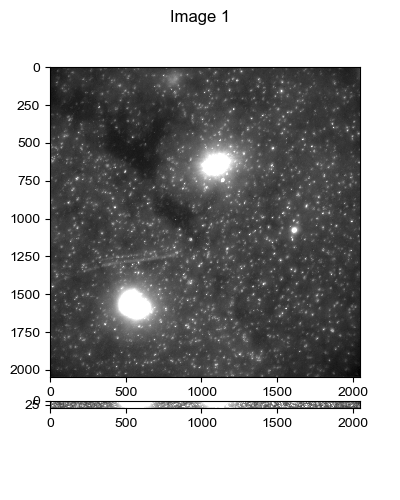

In [16]:
%matplotlib notebook
# visualize chromsome image:
visual_tools.imshow_mark_3d_v2([fov.chrom_im])

## 3.2 find candidate chromosomes

In [17]:
chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_filt_size=4,
                                                               _binary_per_th=99., 
                                                               _morphology_size=2,
                                                               _overwrite=True)

-- adjust seed image with filter size=4
-- binarize image with threshold: 99.0%
-- erosion and dialation with size=2.
-- find close objects.
-- random walk segmentation, beta=10.


C:\Users\puzheng\Documents\ImageAnalysis3\segmentation_tools\chromosome.py:79: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  _seg_label = random_walker(adj_chrom_im, _label, beta=10, mode='cg_mg')


-- find objects larger than size=50
-- 1240 objects are found by segmentation.
- Start multiprocessing caluclate chromosome coordinates with 6 threads in 2552.441s.
-- saving fov_info to file: W:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_07.hdf5
++ base attributes saved:['cand_chrom_coords'] in 0.419s.


## 3.3 select among candidate chromosomes

In [12]:
chrom_coords = fov._select_chromosome_by_candidate_spots(_good_chr_loss_th=0.5,
                                                         _cand_spot_intensity_th=0.5,
                                                         _save=True, 
                                                         _overwrite=True)

- start select from 482 chromosomes with loss threshold=0.5
-- remove chr id 0, percentage of lost rounds:0.792.
-- remove chr id 12, percentage of lost rounds:0.792.
-- remove chr id 6, percentage of lost rounds:0.667.
-- remove chr id 379, percentage of lost rounds:0.625.
-- remove chr id 309, percentage of lost rounds:0.583.
-- remove chr id 335, percentage of lost rounds:0.542.
-- 476 chromosomes are kept.
-- saving fov_info to file: D:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_03.hdf5
++ base attributes saved:['chrom_coords'] in 0.228s.


### visualize chromosomes selections

<IPython.core.display.Javascript object>


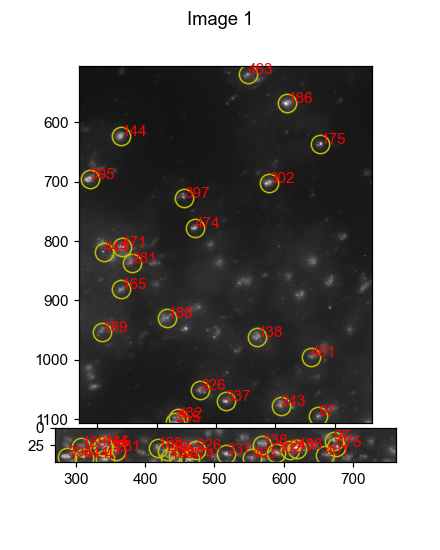

In [13]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )


In [144]:
fov.color_dic

{'H0R0': ['', '', '', 'beads', 'DAPI'],
 'H1R1': ['u41', 'u42', '', 'beads'],
 'H2R2': ['u66', 'u67', '', 'beads'],
 'H3R3': ['u69', 'u70', '', 'beads'],
 'H4R4': ['u72', 'u73', '', 'beads'],
 'H5R5': ['u75', 'u76', '', 'beads'],
 'H6R6': ['u78', 'u79', '', 'beads'],
 'H7R7': ['u81', 'u82', '', 'beads'],
 'H8R8': ['u99', 'u100', '', 'beads'],
 'H9R9': ['u102', 'u103', '', 'beads'],
 'H10R10': ['u105', 'u106', '', 'beads'],
 'H11R11': ['u108', 'u109', '', 'beads'],
 'H12R12': ['u111', 'u112', '', 'beads'],
 'H13R13': ['', 'reverse_chrom', '', 'beads']}

In [28]:
fov.unique_ids[:14]

array([41, 42, 66, 67, 69, 70, 72, 73, 75, 76, 78, 79, 81, 82])

In [32]:
before_fov_param = {
    'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Before_clearing',
    'save_folder':r'D:\Pu_Temp\20201127_IgH_P-brain\before_clearing',
    #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
    'experiment_type': 'DNA',
    'num_threads': 12,
    'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201204-Corrections_3color_50',
    'shared_parameters':{
         'single_im_size':[50,2048,2048],
         'corr_channels':['750','647','561'],
         'num_empty_frames': 0, 
         'corr_hot_pixel':True,
         'corr_Z_shift':False,
         'min_num_seeds':500,
         'max_num_seeds': 2500,
         'spot_seeding_th':150,
         'normalize_intensity_local':True,
         'normalize_intensity_background':False,
         },             
     }
before_fov = classes.field_of_view.Field_of_View(before_fov_param, _fov_id=3,
                                                 _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                                  }, 
                                                  _prioritize_saved_attrs=False,
                                                  )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 8
- Number of field of views: 60
- Importing csv file: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Before_clearing\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 8 folders are found according to color-usage annotation.
+ loading fov_info from file: D:\Pu_Temp\20201127_IgH_P-brain\before_clearing\Conv_zscan_03.hdf5
++ base attributes loaded:['cand_chrom_coords', 'chrom_coords', 'chrom_im', 'ref_im'] in 3.439s.
+ loading correction from file: D:\Pu_Temp\20201127_IgH_P-brain\before_clearing\Conv_zscan_03.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: D:\Pu_T

## Load DAPI-image as reference

In [33]:
fov._load_dapi_image()
before_fov._load_dapi_image()

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\H0R0.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\H0R0.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\H0R0\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\H0R0\Conv_zscan_03.dax  in 24.165s
-- removing hot pixels for channels:['405'] in 7.276s
-- illumination correction for channels: 405, in 1.538s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 33.582s
-- saving fov_info to file: D:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_03.hdf5
++ base attributes saved:['dapi_im'] in 4.672s.
--

array([[[1509, 1401, 1290, ...,  982, 1009,  917],
        [1310, 1436, 1359, ...,  951,  874, 1120],
        [1571, 1424, 1448, ..., 1126,  982, 1105],
        ...,
        [8193, 8163, 7863, ..., 4060, 4229, 4412],
        [7981, 7632, 7847, ..., 4240, 4185, 4446],
        [8211, 8070, 8258, ..., 3930, 4165, 4394]],

       [[1339, 1225, 1418, ...,  920, 1022,  982],
        [1456, 1302, 1326, ...,  969, 1114,  954],
        [1438, 1476, 1389, ...,  997, 1191,  892],
        ...,
        [8131, 7923, 7804, ..., 4219, 4034, 4133],
        [8170, 7813, 7847, ..., 4180, 4019, 3829],
        [8080, 7757, 8258, ..., 4360, 4339, 4391]],

       [[1320, 1505, 1488, ..., 1022,  923, 1040],
        [1513, 1415, 1326, ..., 1117,  991,  889],
        [1422, 1343, 1276, ...,  883, 1015,  871],
        ...,
        [7818, 8041, 7863, ..., 4154, 4216, 4243],
        [7855, 8055, 7666, ..., 4063, 4079, 4290],
        [7886, 7820, 7825, ..., 4443, 4222, 4404]],

       ...,

       [[1727, 1689, 181

# calculate rotation matrix

In [34]:
from ImageAnalysis3 import alignment_tools
reload(alignment_tools)
experiment_folder = r'U:\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Experiments'
before_position_file = os.path.join(experiment_folder, '10x_positions.txt')
after_position_file = os.path.join(experiment_folder, '10x_positions_after.txt')
R, T = alignment_tools.align_manual_points(before_position_file, after_position_file, save=False)

- Manually picked points aligned, rotation:
[[ 0.99989683 -0.01436443]
 [ 0.01436443  0.99989683]],
 translation:[ 593.98776915 -207.2862716 ]


<IPython.core.display.Javascript object>


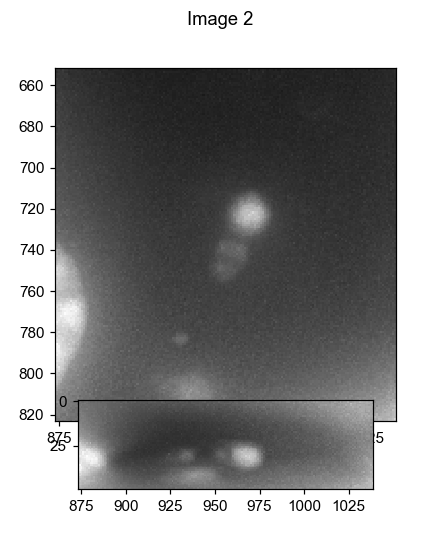

In [122]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([before_fov.dapi_im, fov.dapi_im, nim])

In [85]:
1096 604  1108 588

<module 'ImageAnalysis3.correction_tools.alignment' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\alignment.py'>

In [76]:
nim.dtype

dtype('uint16')

In [119]:
reload(correction_tools.alignment)

nim, rot, dft = correction_tools.alignment.calculate_translation(before_fov.dapi_im, 
                                                                 fov.dapi_im, R)

-- start calculating drift with rotation between images
-- aligning image -> directly use image
-- directly use ref_image
--- drift: [  2.65  10.18 -13.78] pixels


In [ ]:
cross_correlation_align_single_image(before_fov.dapi_im)

In [67]:
calculate_translation(before_fov.dapi_im, fov.dapi_im, R )

(2, 2)


In [63]:
R[:1]

array([[ 0.99989683, -0.01436443]])

In [41]:
reload(correction_tools.alignment)
nim, M = correction_tools.alignment.generate_translation_from_DAPI(before_fov.dapi_im, fov.dapi_im,
                                                          R)

-- start calculating drift between DAPI images
-- start generating translated segmentation labels


In [68]:
correction_tools.alignment.cross_correlation_align_single_image(before_fov.dapi_im, nim, #fov.dapi_im,
                                                                single_im_size=fov.shared_parameters['single_im_size'])

-- aligning image -> directly use image
-- directly use ref_image


array([ -2.65, -10.18,  13.78])

In [126]:
reload(spot_tools)



<module 'ImageAnalysis3.spot_tools.translating' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\spot_tools\\translating.py'>

array([[ 12.65      , 964.04985403, 723.19776632]])

In [134]:
reload(spot_tools.translating)

fov.chrom_coords = spot_tools.translating.translate_spots(before_fov.chrom_coords, 
                                   rot, dft)

<IPython.core.display.Javascript object>


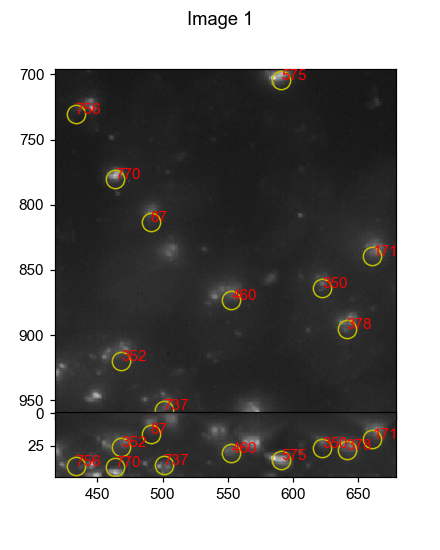

In [135]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )

# find spots

In [170]:
fov.color_dic

{'H0R0': ['', '', '', 'beads', 'DAPI'],
 'H1R1': ['u41', 'u42', '', 'beads'],
 'H2R2': ['u66', 'u67', '', 'beads'],
 'H3R3': ['u69', 'u70', '', 'beads'],
 'H4R4': ['u72', 'u73', '', 'beads'],
 'H5R5': ['u75', 'u76', '', 'beads'],
 'H6R6': ['u78', 'u79', '', 'beads'],
 'H7R7': ['u81', 'u82', '', 'beads'],
 'H8R8': ['u99', 'u100', '', 'beads'],
 'H9R9': ['u102', 'u103', '', 'beads'],
 'H10R10': ['u105', 'u106', '', 'beads'],
 'H11R11': ['u108', 'u109', '', 'beads'],
 'H12R12': ['u111', 'u112', '', 'beads'],
 'H13R13': ['', 'reverse_chrom', '', 'beads']}

## select spots based on chromosomes

In [156]:
fov._load_from_file('unique')

+ loading unique from file: D:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_06.hdf5
++ finish loading unique in 0.050s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1413: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


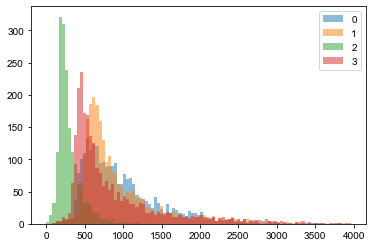

In [171]:
plt.figure()
for _reg_id in range(4):
    plt.hist(fov.unique_spots_list[_reg_id][:,0], bins=np.arange(0,4000,40), 
             label=f"{_reg_id}", alpha=0.5)
plt.legend()
plt.show()

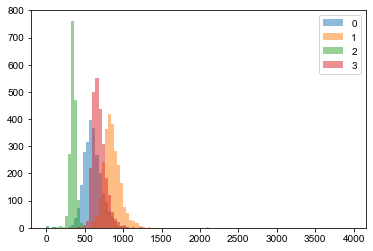

In [172]:
plt.figure()
for _reg_id in range(4):
    plt.hist(fov.unique_spots_list[_reg_id][:,4], bins=np.arange(0,4000,40), 
             label=f"{_reg_id}", alpha=0.5)
plt.legend()
plt.show()

In [146]:
intensity_th = 0.25
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

kept_spots_list = []
for _spots in fov.unique_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in fov.chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)
print(f"kept chromosomes: {len(fov.chrom_coords)}")

kept chromosomes: 778


In [147]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids

In [148]:
# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 5000nm
sel_dna_cand_hzxys_list = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, fov.chrom_coords):
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[_dists < dist_th])
            
    # append
    sel_dna_cand_hzxys_list.append(_sel_cands_list)

- iter:0
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 4.063s
-- collapse all regions into 1d.


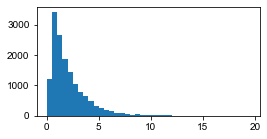

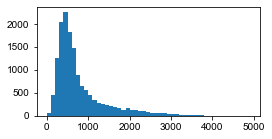

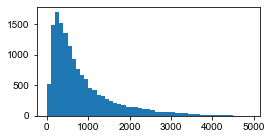

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.185s
-- region kept: 0.8028
- iter:1
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.920s
-- collapse all regions into 1d.


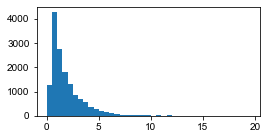

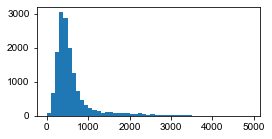

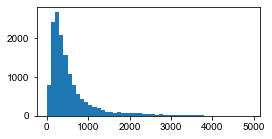

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.046s
-- region kept: 0.8958
- iter:2
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.828s
-- collapse all regions into 1d.


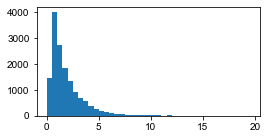

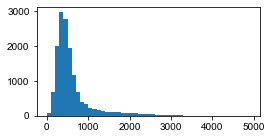

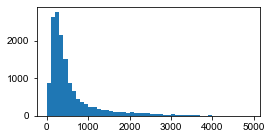

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.006s
-- region kept: 0.9143
- iter:3
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.832s
-- collapse all regions into 1d.


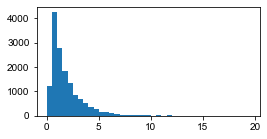

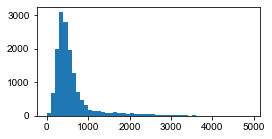

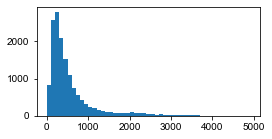

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 3.953s
-- region kept: 0.9547
- iter:4
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.844s
-- collapse all regions into 1d.


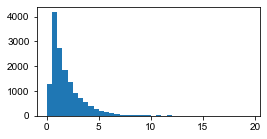

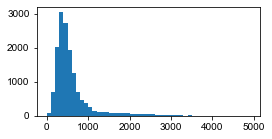

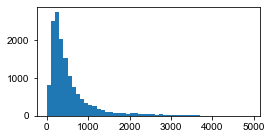

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.047s
-- region kept: 0.9122
- iter:5
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.844s
-- collapse all regions into 1d.


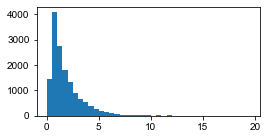

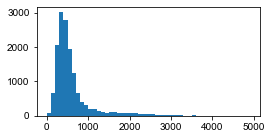

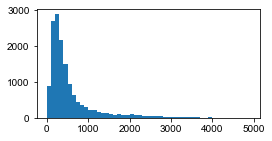

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 3.925s
-- region kept: 0.9232
- iter:6
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.937s
-- collapse all regions into 1d.


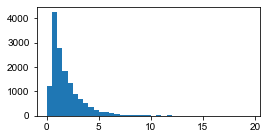

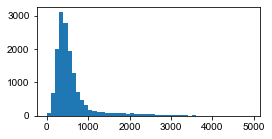

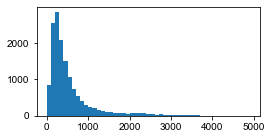

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 3.960s
-- region kept: 0.9607
- iter:7
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.926s
-- collapse all regions into 1d.


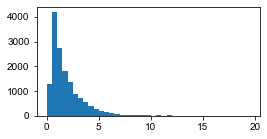

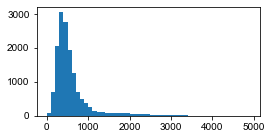

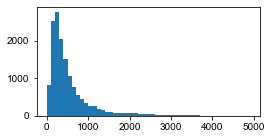

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.172s
-- region kept: 0.9144
- iter:8
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.922s
-- collapse all regions into 1d.


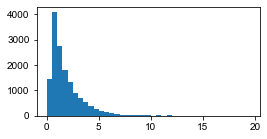

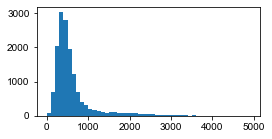

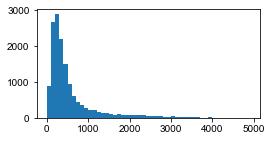

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.064s
-- region kept: 0.9246
- iter:9
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.972s
-- collapse all regions into 1d.


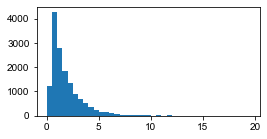

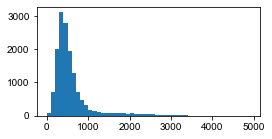

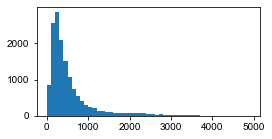

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.155s
-- region kept: 0.9614


In [149]:
reload(ia.spot_tools.picking)
# load functions
from ImageAnalysis3.spot_tools.picking import Pick_spots_by_intensity, EM_pick_scores_in_population, generate_reference_from_population,evaluate_differences

%matplotlib inline
niter= 10
nkeep = len(sel_dna_cand_hzxys_list)
num_threads = 12
# initialize
init_dna_hzxys = Pick_spots_by_intensity(sel_dna_cand_hzxys_list[:nkeep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []
for _iter in range(niter):
    print(f"- iter:{_iter}")
    # generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1][:nkeep], dna_reg_ids,
        num_threads=num_threads,
        collapse_regions=True,
    )
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ints), bins=np.arange(0,20,0.5))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ct_dists), bins=np.arange(0,5000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_local_dists), bins=np.arange(0,5000,100))
    plt.show()
    # scoring
    sel_hzxys, sel_scores, all_scores = EM_pick_scores_in_population(
            sel_dna_cand_hzxys_list[:nkeep], dna_reg_ids, sel_dna_hzxys_list[-1], 
            ref_ct_dists, ref_local_dists, ref_ints,
            sel_dna_hzxys_list[-1], dna_reg_ids, num_threads=num_threads,
        )
    update_rate = evaluate_differences(sel_hzxys, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    sel_dna_hzxys_list.append(sel_hzxys)
    sel_dna_scores_list.append(sel_scores)
    all_dna_scores_list.append(all_scores)
    
    if update_rate > 0.99:
        break

In [150]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
distmap_list = []
score_th = np.exp(-6)
bad_spot_percentage = 0.6
for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    _kept_hzxys[_scores < score_th] = np.nan
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))

distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

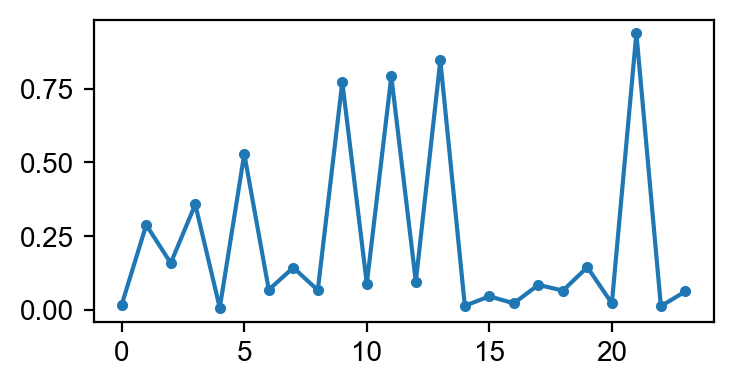

In [151]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
#ax.set_xticks(np.arange(0,150,20))
plt.show()

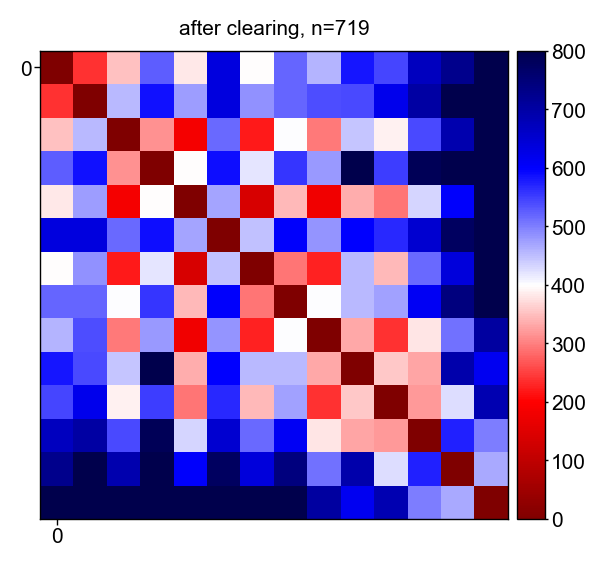

In [152]:
fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(#median_distmap,
                                               median_distmap[:14,:14], 
                                               color_limits=[0,800],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=200)
ax.set_title(f"after clearing, n={len(distmap_list)}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()